In [14]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the dataset
url = "G:/Datasets/diabete_prediction/diabetes_prediction_dataset.csv"
columns = [
    'gender', 'age', 'hypertension', 'heart_disease', 
    'smoking_history', 'bmi', 'HbA1c_level', 
    'blood_glucose_level', 'diabetes'
]
df=pd.read_csv(url, header=0, names=columns, na_values=['?', 'No Info'])
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,NaN,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [16]:
df.isnull().sum()

gender                     0
age                        0
hypertension               0
heart_disease              0
smoking_history        35816
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes                   0
dtype: int64

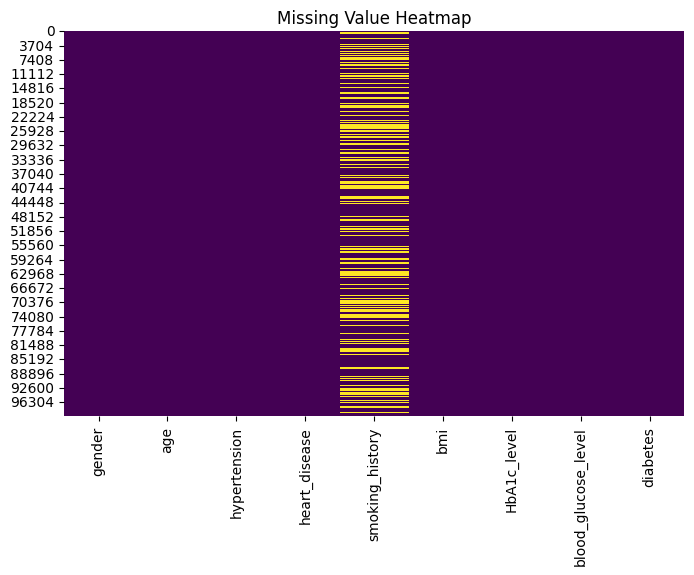

In [17]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

In [18]:
df.dropna(inplace=True)
df.shape

(64184, 9)

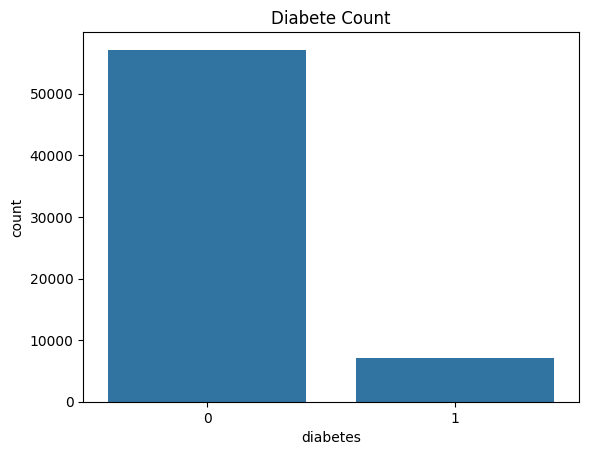

In [19]:
sns.countplot(x='diabetes', data=df)
plt.title("Diabete Count")
plt.show()

In [20]:
# Split the data into features and target
X=df.drop('diabetes', axis=1)
y=df['diabetes']

# Define categorical and numerical column
categorical_col=['gender', 'smoking_history']
numerical_col=['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Define the preprocessing pipeline
preprocessor=ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_col),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_col)
])

#Split Date into Train and Test
X_train, X_test, y_train, y_train=train_test_split(X, y, random_state=20, test_size=0.2)

In [ ]:
# Define the pipeline
pipline=Pipeline(steps=[('Preprocessor', preprocessor),
                        ("Classifier", LogisticRegression(random_state=42))])
pipline.fit(X_train, y_train)


ValueError: Found input variables with inconsistent numbers of samples: [51347, 12837]